In [1]:
import sys
import torch
import torchaudio
import matplotlib.pyplot as plt 
import librosa
sys.path.append("/Users/baranserajelahi/fastai_audio")
from audio import *

In [2]:
def get_waveform():
    #loads in a waveform. For stereo signals the two channels are avereged
    #to yield 1 channel.
    filename = 'birdsong-recognition/valid/olsfly/XC484154.mp3'
    #waveform, sample_rate = librosa.load(filename, sr=None)
    waveform, sample_rate = torchaudio.load(filename)
    #waveform = torch.from_numpy(waveform)
    if waveform.size()[0]==2:
        waveform = torch.mean(waveform, dim=0, keepdim=True)
    return waveform, sample_rate 

In [4]:
import glob

In [83]:
?glob.iglob

In [5]:
ls

LICENSE                    pre-processing.ipynb
README.md                  pre-processing.py*
birdsong-recognition/      submission-notebook.ipynb
birdsong-recognition.zip   utils/
example.py


In [13]:
files = list(glob.iglob('birdsong-recognition/valid_s/**', recursive=True))

In [14]:
files

['birdsong-recognition/valid_s/',
 'birdsong-recognition/valid_s/amecro',
 'birdsong-recognition/valid_s/amecro/XC496355.mp3',
 'birdsong-recognition/valid_s/amecro/XC496354.mp3',
 'birdsong-recognition/valid_s/amecro/XC480052.mp3',
 'birdsong-recognition/valid_s/amecro/XC414021.mp3',
 'birdsong-recognition/valid_s/amecro/XC460987.mp3',
 'birdsong-recognition/valid_s/amecro/XC413789.mp3',
 'birdsong-recognition/valid_s/amecro/XC388685.mp3',
 'birdsong-recognition/valid_s/amecro/XC393299.mp3',
 'birdsong-recognition/valid_s/amecro/XC451209.mp3',
 'birdsong-recognition/valid_s/amecro/XC481933.mp3',
 'birdsong-recognition/valid_s/amecro/XC478839.mp3',
 'birdsong-recognition/valid_s/amecro/XC456644.mp3',
 'birdsong-recognition/valid_s/amecro/XC414931.mp3',
 'birdsong-recognition/valid_s/amecro/XC404505.mp3',
 'birdsong-recognition/valid_s/amecro/XC454252.mp3',
 'birdsong-recognition/valid_s/amecro/XC481136.mp3',
 'birdsong-recognition/valid_s/amecro/XC459466.mp3',
 'birdsong-recognition/va

In [15]:
from tqdm import tqdm       

In [16]:
def check_files():
    num_bad_files = 0
    for filename in tqdm(files, desc='trying to open file', total=len(files)):
        if filename.endswith('.mp3'):
            try:
                wf, sr = torchaudio.load(filename)
            except:
                os.remove(filename)
                print(f'deleted {filename}')
                num_bad_files += 1
    return num_bad_files

In [17]:
num = check_files()

trying to open file: 100%|██████████| 81/81 [00:28<00:00,  2.86it/s]


In [16]:
num

65275

In [22]:
waveform, sample_rate = get_waveform()
print(f'Shape of waveform: {waveform.size()}')
print(f'Sample rate of waveform: {sample_rate}')

Shape of waveform: torch.Size([1, 624384])
Sample rate of waveform: 48000


In [42]:
def check_file(filename):
    wf, sr = torchaudio.load(filename)

In [43]:
check_file('birdsong-recognition/valid/olsfly/XC484154.mp3')

OSError: filename not found or is a directory

In [78]:
Audio(waveform, rate=sample_rate)

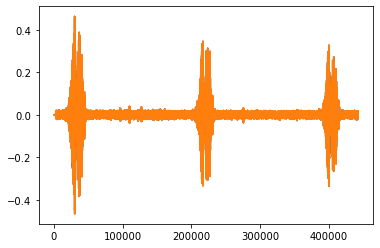

In [29]:
plt.figure()
plt.plot(waveform.t().numpy()) 

In [30]:
spec = torchaudio.transforms.Spectrogram()(waveform)
print(f'Shape of spectrogram: {spec.size()}')

Shape of spectrogram: torch.Size([2, 201, 2212])


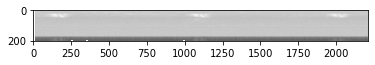

In [35]:
plt.figure()
# plt.imshow(spec.log2().numpy().squeeze())
# plt.figure()
plt.imshow(spec.log2().squeeze()[0], cmap='gray')

In [36]:
melspec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate)(waveform)
print(f'Shape of melspec: {melspec.size()}')

Shape of melspec: torch.Size([2, 128, 2212])


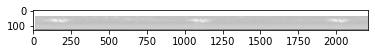

In [38]:
plt.figure()
plt.imshow(melspec.log2().squeeze()[0], cmap='gray')